# クラス比重み付き最小二乗法
訓練データとテストデータでクラスごとのデータ割合が異なるような場合の転移学習の設定．  
クラスごとの分布間距離を近似的に求め，求まったクラス比で線形モデルを重み付けする．  

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# データ生成
def generate_data(n_total, n_positive, random_state):
    np.random.seed(random_state)
    x = np.random.normal(size=(n_total, 2))
    x[:n_positive, 0] -= 2
    x[n_positive:, 0] += 2
    x[:, 1] *= 2.
    y = np.empty(n_total, dtype=np.int64)
    y[:n_positive] = 0
    y[n_positive:] = 1
    return x, y

In [3]:
# クラス比重み付き最小二乗法
def cwls(train_x, train_y, test_x):
    # クラスごとのサンプルを抽出
    train_pos = train_x[train_y == 1]
    train_neg = train_x[train_y == 0]
    
    #　必要な期待値をサンプル平均から計算
    a1 = np.sum(np.sum(np.abs(train_pos[:,None] - train_pos[None]), axis=0), axis=0)/(len(train_pos)*len(train_pos))
    a2 = np.sum(np.sum(np.abs(train_pos[:,None] - train_neg[None]), axis=0), axis=0)/(len(train_pos)*len(train_neg))
    a3 = np.sum(np.sum(np.abs(train_neg[:,None] - train_neg[None]), axis=0), axis=0)/(len(train_neg)*len(train_neg))
    b1 = np.sum(np.sum(np.abs(test_x[:,None] - train_pos[None]), axis=0), axis=0)/(len(test_x)*len(train_pos))
    b2 = np.sum(np.sum(np.abs(test_x[:,None] - train_neg[None]), axis=0), axis=0)/(len(test_x)*len(train_neg))
    
    #
    pi = (a2 - a3 - b1 + b2)/(2*a2 - a1 - a3)
    theta = np.maximum(1, np.minimum(0,pi))
    theta = [pi[0],pi[1],0]
    
    return theta

In [4]:
# 可視化
def visualize(train_x, train_y, test_x, test_y, theta):
    for x, y, name in [(train_x, train_y, 'train'), (test_x, test_y, 'test')]:
        plt.clf()
        plt.figure(figsize=(6, 6))
        plt.xlim(-5., 5.)
        plt.ylim(-7., 7.)
        lin = np.array([-5., 5.])
        plt.plot(lin, -(theta[2] + lin * theta[0]) / theta[1])
        plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1],
                    marker='$O$', c='blue')
        plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1],
                    marker='$X$', c='red')
        #plt.savefig('lecture9-h3-{}.png'.format(name))
        plt.show()

<Figure size 432x288 with 0 Axes>

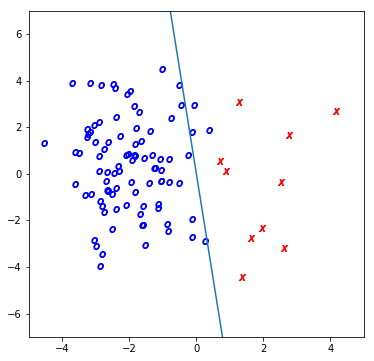

<Figure size 432x288 with 0 Axes>

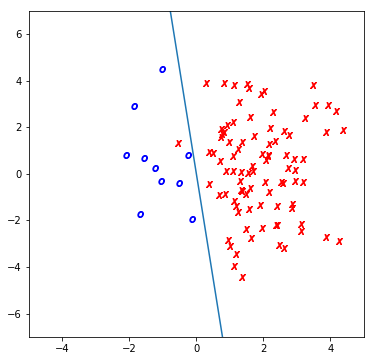

In [5]:
train_x, train_y = generate_data(n_total=100, n_positive=90, random_state=0)
eval_x, eval_y = generate_data(n_total=100, n_positive=10, random_state=0)
theta = cwls(train_x, train_y, eval_x)
visualize(train_x, train_y, eval_x, eval_y, theta)

訓練データとテストデータそれぞれについて分類結果を可視化している．  
訓練データとテストデータでクラス割合が大きく異なるが，ノイズにもある程度ロバストな線形モデルが求められている．  